#### <font color = 'green'> Comparative Model Analysis on the prediction of flood at a given period 

##### project delivered by: <font color = 'gold'> Olanrewaju Adegoke

In [1]:
# Reserved for Libraries Installation

In [2]:
# Reserved for Libraries import

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_12668\1755870329.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##### Deliverables

##### Define the file paths

In [4]:
data_path = '../data/'
transform_path = '../data_transforms/'
model_path = '../models/'
output_path = '../outputs/'

##### Load the dataset

In [5]:
flood = pd.read_csv(data_path + 'FloodPrediction.csv')
flood.head()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


##### Renaming the class column properly

In [6]:
flood.rename(columns={'Flood?': 'Flood'}, inplace=True)
flood.head()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


In [7]:
flood.shape

(20544, 19)

In [8]:
flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

In [9]:
# checking for missing values in the dataset
flood.isna().sum()

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood                16051
dtype: int64

In [10]:
# Deductions:

print(f"Flood column has over 16000+ missing values which is about {round((flood.Flood.isna().sum()/len(flood))*100,2)}% of the entire dataset.")

# We approach this by uniquely identifying the entries that make up the Flood columns.
# We split the entire dataset into entries with missing values and those without missing values.
# Since the only affected column is the target column - 'Flood', we focus on it.

Flood column has over 16000+ missing values which is about 78.13% of the entire dataset.


In [11]:
# Unique Values in the Flood column
#flood['Flood'].unique()
flood.Flood.unique()

array([nan,  1.,  0.])

##### Selecting Relevant Columns for Flood Predictions

In [12]:
flood.columns

Index(['Sl', 'Station_Names', 'Year', 'Month', 'Max_Temp', 'Min_Temp',
       'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage',
       'Bright_Sunshine', 'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE',
       'LONGITUDE', 'ALT', 'Period', 'Flood'],
      dtype='object')

In [13]:
use_cols = ['Year', 'Month', 'Max_Temp', 'Min_Temp',
       'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage',
       'Bright_Sunshine', 'LATITUDE',
       'LONGITUDE', 'ALT', 'Flood']

In [14]:
flood_data = flood[use_cols]
flood_data.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.7,90.36,4,NaN
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.7,90.36,4,NaN
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,22.7,90.36,4,NaN
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,22.7,90.36,4,NaN
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,22.7,90.36,4,NaN


##### Splitting the dataset

In [15]:
# Dataset with NaN
flood_data_with_NaN = flood_data[flood_data['Flood'].isna()]
flood_data_with_NaN.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.7,90.36,4,NaN
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.7,90.36,4,NaN
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,22.7,90.36,4,NaN
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,22.7,90.36,4,NaN
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,22.7,90.36,4,NaN


In [16]:
# Dataset without NaN
flood_data_without_NaN = flood_data[flood_data['Flood'] >= 0]
flood_data_without_NaN.head()

#flood_data_without_NaN = flood_data.loc[flood_data['Flood'] >= 0]

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
5,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,22.7,90.36,4,1.0
6,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,22.7,90.36,4,1.0
7,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,22.7,90.36,4,1.0
16,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,22.7,90.36,4,1.0
17,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,22.7,90.36,4,1.0


In [17]:
flood_data_without_NaN.describe()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
count,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000
mean,1986.393056,7.221678,34.017633,24.589457,526.001857,85.363425,1.792189,5.554604,4.736064,23.237650,90.655568,13.391720,0.919653
std,17.578940,1.857286,1.830043,2.662917,271.375965,5.299593,1.118093,1.436558,1.461535,1.244211,1.118019,14.118934,0.271860
min,1948.000000,1.000000,26.000000,8.500000,0.000000,52.000000,0.000000,0.000000,0.700000,20.870000,88.560000,0.000000,0.000000
25%,1973.000000,6.000000,33.000000,24.600000,385.000000,84.000000,1.000000,5.200000,3.800000,22.360000,89.840000,4.000000,1.000000
50%,1988.000000,7.000000,34.000000,25.400000,494.000000,87.000000,1.544444,6.000000,4.435849,22.830000,90.670000,6.000000,1.000000
75%,2001.000000,8.000000,35.100000,25.800000,661.000000,88.000000,2.300000,6.434483,5.400000,24.120000,91.730000,19.000000,1.000000
max,2013.000000,12.000000,43.700000,27.700000,2072.000000,96.000000,7.800000,7.900000,10.700000,25.720000,92.260000,63.000000,1.000000


##### Visualizations

<Axes: ylabel='Density'>

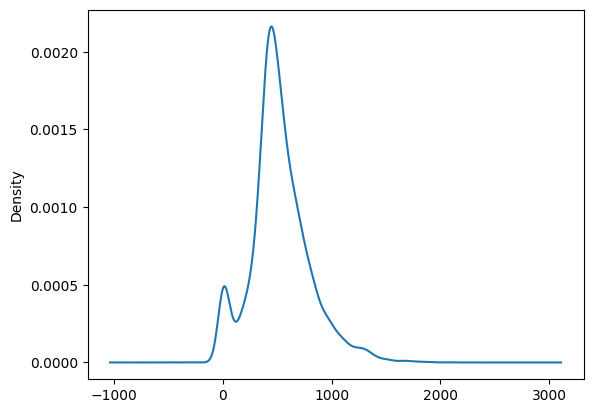

In [18]:
flood_data_without_NaN.Rainfall.plot(kind='density')

<Axes: ylabel='Density'>

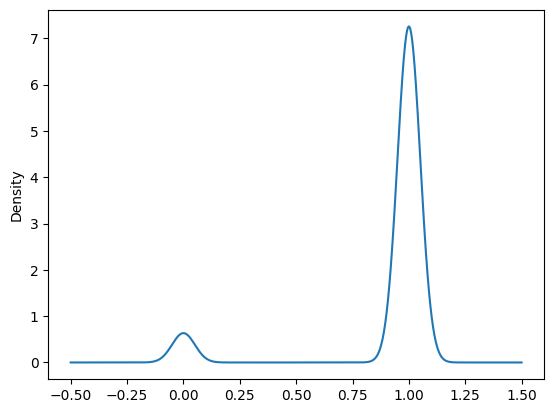

In [19]:
flood_data_without_NaN.Flood.plot(kind='density')

<Axes: >

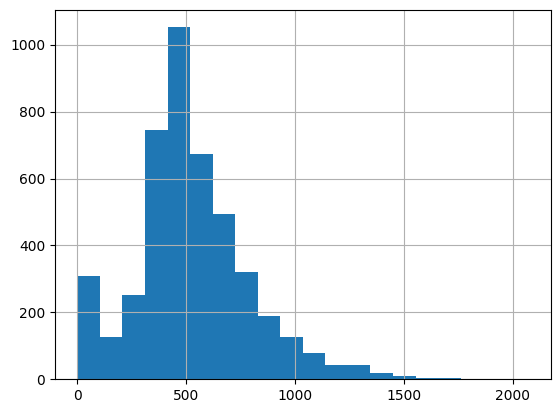

In [20]:
flood_data_without_NaN.Rainfall.hist(bins=20)

In [21]:
#### Convert to array
floodArr = flood_data_without_NaN.values
floodArr[1]

array([1.94900000e+03, 7.00000000e+00, 3.34000000e+01, 2.58000000e+01,
       5.75000000e+02, 8.50000000e+01, 1.57037037e+00, 5.40000000e+00,
       3.73829787e+00, 2.27000000e+01, 9.03600000e+01, 4.00000000e+00,
       1.00000000e+00])

In [22]:
list(flood_data_without_NaN.columns).index('Flood')

12

In [23]:
##### Selecting the features X and the target y

X = floodArr[:, :12]
y = floodArr[:, 12]

###### Standardize the X variables to be normally distributed with mean 0 and std 1

In [24]:
scaler = StandardScaler()
scaler

StandardScaler()

In [25]:
# Fit and transform the X
scaler.fit(X)
X = scaler.transform(X)
X

array([[-2.12738759, -0.65784914,  0.20896186, ..., -0.432169  ,
        -0.26439744, -0.66526027],
       [-2.12738759, -0.11936924, -0.33753409, ..., -0.432169  ,
        -0.26439744, -0.66526027],
       [-2.12738759,  0.41911066, -0.28288449, ..., -0.432169  ,
        -0.26439744, -0.66526027],
       ...,
       [ 1.51373782, -0.65784914, -0.44683328, ..., -1.90314406,
         1.43522629, -0.66526027],
       [ 1.51373782, -0.11936924, -0.99332923, ..., -1.90314406,
         1.43522629, -0.66526027],
       [ 1.51373782,  0.41911066, -0.82938044, ..., -1.90314406,
         1.43522629, -0.66526027]])

In [26]:
round(X.mean()), round(X.std())

(0, 1)

##### Train Test Split the dataset

In [27]:
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

###### Train the model

In [28]:
RF_model = RandomForestClassifier()
RF_model

RandomForestClassifier()

In [29]:
# Fit the model
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Predictions
y_pred = RF_model.predict(X_test)
y_pred[:10]

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [31]:
y_test[:10]

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [32]:
num = 10
print(
    'The probability of correct predition is: '
   f"{(y_pred[:num] == y_test[:num]).sum()}/{num}"
)

The probability of correct predition is: 10/10


In [33]:
# Score the performance
score = RF_model.score(X_test, y_test)
score

0.9933259176863182

In [34]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9933259176863182

##### Save the model

In [35]:
joblib.dump(RF_model, model_path + 'RF_model_to_predict_NaN_v1.pkl')

['../models/RF_model_to_predict_NaN_v1.pkl']

### We need to now preprocess the 'flood_data_with_NaN' as a validation set

In [36]:
flood_data_with_NaN.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.7,90.36,4,NaN
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.7,90.36,4,NaN
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,22.7,90.36,4,NaN
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,22.7,90.36,4,NaN
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,22.7,90.36,4,NaN


In [37]:
flood_data_with_NaN.describe()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
count,16051.000000,16051.000000,16051.000000,16051.000000,16051.00000,16051.000000,16051.000000,16051.000000,16051.000000,16051.000000,16051.000000,16051.000000,0.0
mean,1985.036197,6.297988,33.292054,20.208821,107.17965,77.855349,1.309480,2.906735,6.890159,23.351559,90.447741,13.347891,NaN
std,17.608823,3.755169,3.183486,5.017437,123.18389,7.420706,0.995026,1.856527,1.515905,1.127865,1.101859,13.360325,NaN
min,1948.000000,1.000000,21.600000,6.200000,0.00000,34.000000,0.000000,0.000000,0.000000,20.870000,88.560000,0.000000,NaN
25%,1971.000000,3.000000,31.000000,15.700000,3.00000,74.000000,0.600000,1.300000,5.920324,22.670000,89.360000,5.000000,NaN
50%,1986.000000,5.000000,33.700000,21.300000,52.00000,79.000000,1.100000,2.600000,7.171429,23.170000,90.390000,7.000000,NaN
75%,2000.000000,10.000000,35.500000,24.800000,191.00000,84.000000,1.800000,4.400000,7.951852,24.290000,91.460000,19.000000,NaN
max,2013.000000,12.000000,44.000000,28.100000,1180.00000,97.000000,11.200000,7.900000,11.000000,25.720000,92.260000,63.000000,NaN


##### Visualizations

<Axes: ylabel='Density'>

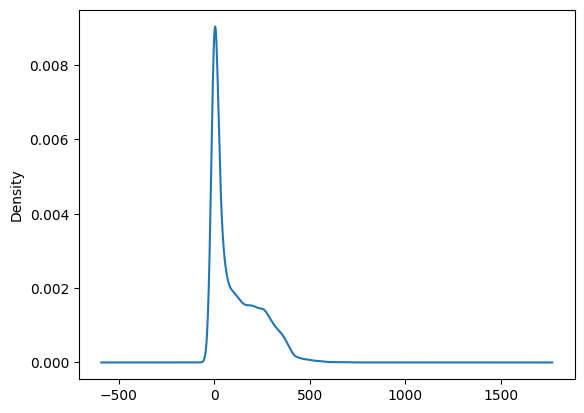

In [38]:
flood_data_with_NaN.Rainfall.plot(kind='density')

<Axes: ylabel='Density'>

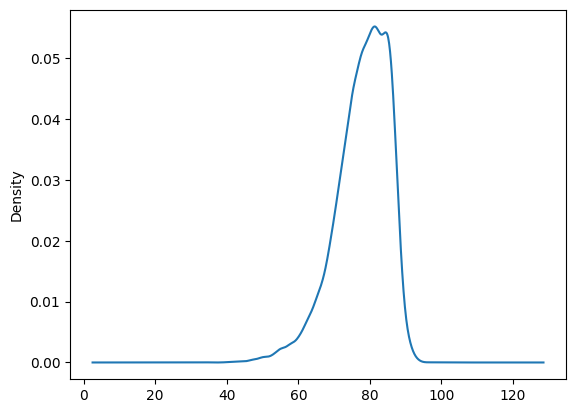

In [39]:
flood_data_with_NaN.Relative_Humidity.plot(kind='density')

<Axes: >

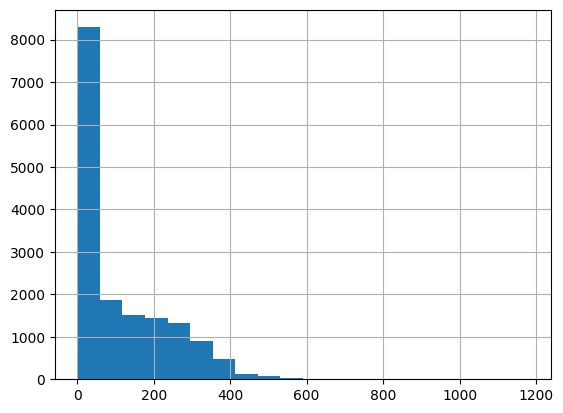

In [40]:
flood_data_with_NaN.Rainfall.hist(bins=20)

In [41]:
# Convert into Array
flood_val_arr = flood_data_with_NaN.values
flood_val_arr[1]

array([1.94900000e+03, 2.00000000e+00, 3.39000000e+01, 1.52000000e+01,
       9.00000000e+00, 6.30000000e+01, 6.59259259e-01, 9.00000000e-01,
       8.31489362e+00, 2.27000000e+01, 9.03600000e+01, 4.00000000e+00,
                  nan])

In [42]:
list(flood_data_with_NaN.columns).index('Flood')

12

In [43]:
##### Selecting the features X and the target y

X = flood_val_arr[:, :12]
y = flood_val_arr[:, 12]

##### Standardize the X variables to be normally distributed with mean 0 and std 1

In [44]:
scaler = StandardScaler()
scaler

StandardScaler()

In [45]:
# Fit and transform the X
scaler.fit(X)
X = scaler.transform(X)
X

array([[-2.04654902, -1.41089609, -1.22261424, ..., -0.57771097,
        -0.07963227, -0.69969723],
       [-2.04654902, -1.14458817,  0.19097477, ..., -0.57771097,
        -0.07963227, -0.69969723],
       [-2.04654902, -0.87828024,  1.07054126, ..., -0.57771097,
        -0.07963227, -0.69969723],
       ...,
       [ 1.58810579,  0.98587522, -0.06032994, ..., -2.20029684,
         1.64477973, -0.69969723],
       [ 1.58810579,  1.25218314, -0.24880848, ..., -2.20029684,
         1.64477973, -0.69969723],
       [ 1.58810579,  1.51849106, -1.0655488 , ..., -2.20029684,
         1.64477973, -0.69969723]])

In [46]:
round(X.mean()), round(X.std())

(0, 1)

##### My transformed X is now the val set to be used with the 'RF_model_to_predict_NaN_v1' in order to predict y

###### Load the saved RF_model

In [47]:
y_nan_pred = joblib.load(model_path + 'RF_model_to_predict_NaN_v1.pkl')

In [48]:
# Predictions of y

y_pred_NaN = y_nan_pred.predict(X)
y_pred_NaN[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

##### Convert the y_pred_NaN to a DataFrame

In [49]:
#flood = pd.DataFrame(y_pred_NaN, columns=['Flood'])
flood_pred = pd.DataFrame({'Flood':y_pred_NaN})
flood_pred

,Flood
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
16046,1.0
16047,1.0
16048,1.0
16049,1.0


In [50]:
flood_pred.Flood.unique()

array([1., 0.])

##### Recall the dataset with NaN values

In [51]:
flood_data_with_NaN.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.7,90.36,4,NaN
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.7,90.36,4,NaN
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,22.7,90.36,4,NaN
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,22.7,90.36,4,NaN
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,22.7,90.36,4,NaN


##### We replace the NaN in the 'Flood' column with the predicted values

In [52]:
flood_data_with_NaN.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.7,90.36,4,NaN
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.7,90.36,4,NaN
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,22.7,90.36,4,NaN
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,22.7,90.36,4,NaN
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,22.7,90.36,4,NaN


In [53]:
flood_data_with_NaN.loc[flood_data_with_NaN['Flood'].isna(), 'Flood'] = y_pred_NaN

In [54]:
flood_data_with_NaN

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.70,90.36,4,1.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.70,90.36,4,1.0
2,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,22.70,90.36,4,1.0
3,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,22.70,90.36,4,1.0
4,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,22.70,90.36,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,2013,4,33.1,24.2,34.0,77.0,4.400000,1.7,9.100000,20.87,92.26,4,1.0
20540,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,20.87,92.26,4,1.0
20541,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,20.87,92.26,4,1.0
20542,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,20.87,92.26,4,1.0


In [55]:
# Check if there is still missing values
flood_data_with_NaN.isna().sum()

Year                 0
Month                0
Max_Temp             0
Min_Temp             0
Rainfall             0
Relative_Humidity    0
Wind_Speed           0
Cloud_Coverage       0
Bright_Sunshine      0
LATITUDE             0
LONGITUDE            0
ALT                  0
Flood                0
dtype: int64

##### Consolidate the two dataset to form a new clean dataset without NaN

In [56]:
flood_data_with_NaN.head(2)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.7,90.36,4,1.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.7,90.36,4,1.0


In [57]:
flood_data_without_NaN.head(2)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
5,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,22.7,90.36,4,1.0
6,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,22.7,90.36,4,1.0


In [58]:
new_clean_flood_data = pd.concat([flood_data_with_NaN, flood_data_without_NaN], axis=0)
new_clean_flood_data.head(2)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.7,90.36,4,1.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.7,90.36,4,1.0


In [59]:
new_clean_flood_data.shape

(20544, 13)

In [60]:
new_clean_flood_data.isna().sum()

Year                 0
Month                0
Max_Temp             0
Min_Temp             0
Rainfall             0
Relative_Humidity    0
Wind_Speed           0
Cloud_Coverage       0
Bright_Sunshine      0
LATITUDE             0
LONGITUDE            0
ALT                  0
Flood                0
dtype: int64

##### Checkpoint: Save the clean dataset for flood

In [61]:
new_clean_flood_data.to_csv(transform_path + 'flood_data_cleaned_prj2.csv', index=False)

#### Training a new model on the cleaned consolidated flood dataset

In [62]:
data = pd.read_csv(transform_path + 'flood_data_cleaned_prj2.csv')
data.head(2)

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,22.7,90.36,4,1.0
1,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,22.7,90.36,4,1.0


In [63]:
data.shape

(20544, 13)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               20544 non-null  int64  
 1   Month              20544 non-null  int64  
 2   Max_Temp           20544 non-null  float64
 3   Min_Temp           20544 non-null  float64
 4   Rainfall           20544 non-null  float64
 5   Relative_Humidity  20544 non-null  float64
 6   Wind_Speed         20544 non-null  float64
 7   Cloud_Coverage     20544 non-null  float64
 8   Bright_Sunshine    20544 non-null  float64
 9   LATITUDE           20544 non-null  float64
 10  LONGITUDE          20544 non-null  float64
 11  ALT                20544 non-null  int64  
 12  Flood              20544 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 2.0 MB


In [65]:
data.Flood.nunique()

2

In [66]:
data.Flood.unique()

array([1., 0.])

In [67]:
data.duplicated().sum()

0

In [68]:
data.Flood.value_counts()

Flood
1.0    20182
0.0      362
Name: count, dtype: int64

##### Deductions:
    There is data imbalance. This dataset tends towards predicting Flood than no Flood and hence it is biased and favors Flooding.
    We need to correct this data imbalance but will be dealt with in the subsequent project.

In [69]:
data.describe()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Flood
count,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000
mean,1985.332944,6.500000,33.450739,21.166872,198.776621,79.497375,1.415049,3.485827,6.419056,23.326647,90.493193,13.357477,0.982379
std,17.610799,3.452137,2.956401,4.949587,240.693197,7.667925,1.042454,2.083791,1.747959,1.155241,1.108720,13.529530,0.131572
min,1948.000000,1.000000,21.600000,6.200000,0.000000,34.000000,0.000000,0.000000,0.000000,20.870000,88.560000,0.000000,0.000000
25%,1972.000000,3.750000,31.700000,16.900000,8.000000,75.000000,0.700000,1.600000,4.965517,22.640000,89.550000,4.000000,1.000000
50%,1987.000000,6.500000,33.900000,23.400000,111.000000,81.000000,1.200000,3.300000,6.800000,23.170000,90.410000,7.000000,1.000000
75%,2000.000000,9.250000,35.400000,25.400000,312.000000,85.000000,1.900000,5.500000,7.800000,24.290000,91.460000,19.000000,1.000000
max,2013.000000,12.000000,44.000000,28.100000,2072.000000,97.000000,11.200000,7.900000,11.000000,25.720000,92.260000,63.000000,1.000000


In [70]:
list(data.columns).index('Flood')

12

##### Visualizations

<Axes: ylabel='Density'>

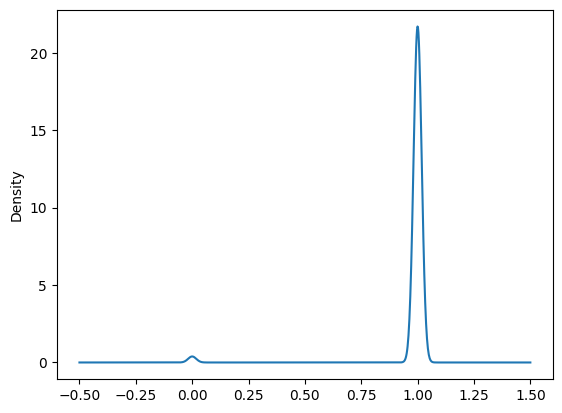

In [71]:
data.Flood.plot(kind='density')

<Axes: ylabel='Density'>

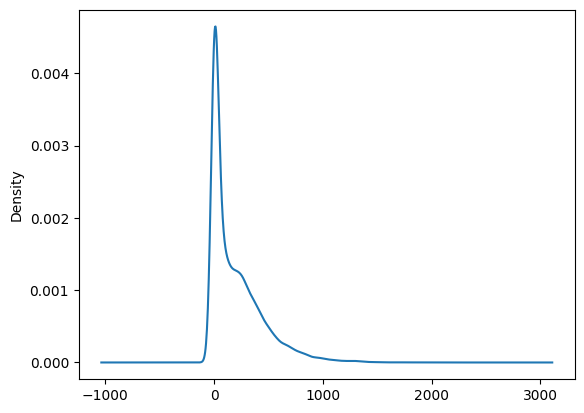

In [72]:
data.Rainfall.plot(kind='density')

<Axes: >

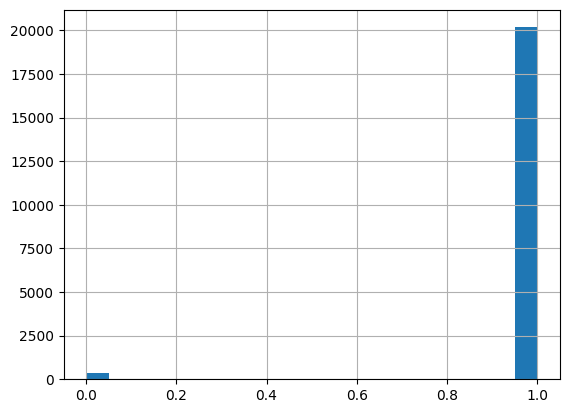

In [73]:
data.Flood.hist(bins=20)

<Axes: >

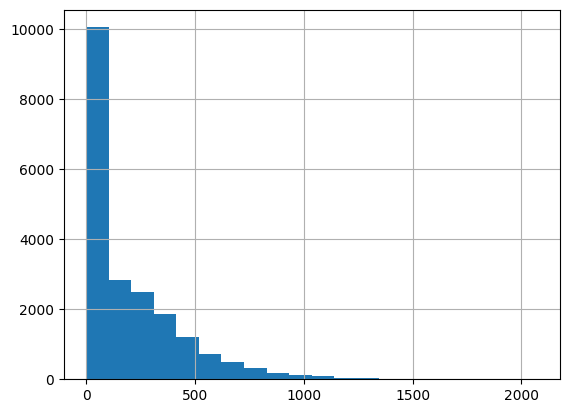

In [74]:
data.Rainfall.hist(bins=20)

###### Convert dataframe to array

In [75]:
dfArr = data.values
dfArr[1]

array([1.94900000e+03, 2.00000000e+00, 3.39000000e+01, 1.52000000e+01,
       9.00000000e+00, 6.30000000e+01, 6.59259259e-01, 9.00000000e-01,
       8.31489362e+00, 2.27000000e+01, 9.03600000e+01, 4.00000000e+00,
       1.00000000e+00])

###### Select the features X and the target y

In [76]:
X = dfArr[:, :12]
y = dfArr[:, 12]

###### Preprocess X by standardizing 

In [77]:
scaler = StandardScaler()
scaler

StandardScaler()

In [78]:
scaler.fit(X)
X = scaler.transform(X)

In [79]:
round(X.mean()), round(X.std())

(0, 1)

#### Build a function that train a model and return the best score and the best seed

###### Logistic Regression Model

In [80]:
model_logreg = LogisticRegression()
model_logreg

LogisticRegression()

In [81]:
seedSearch = range(50)

def train_and_score(model, X, y):
    '''
    This function preprocess, split, fit, predict and score a training model on a range of seeds
    and select the seed that gives best score which measures its performance.

    inputs: model - the model of choice
            X - the features selected
            y - the target
            
    outputs: its print out the best score and the best seed in the range of seeds indicated
    
    '''
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    best_score = None
    best_seed = None
    
    for seed in seedSearch:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test, y_test)

        mean_score = np.mean(score)
        if best_score is None or mean_score > best_score:
            best_score = mean_score
            best_seed = seed

    print(f"best_score is: {best_score} | best_seed is: {best_seed}")     

In [82]:
train_and_score(model_logreg, X, y)

best_score is: 0.9863724853990915 | best_seed is: 16


###### The Support Vector Machine Model

In [83]:
model_svm = svm.SVC()
model_svm

SVC()

###### Train and Score using the function

In [84]:
train_and_score(model_svm, X, y)

best_score is: 0.991239454899416 | best_seed is: 16


###### The K-Nearest Neighbors Model

In [85]:
model_knn = KNeighborsClassifier()
model_knn

KNeighborsClassifier()

###### Train and Score the model using the function

In [86]:
train_and_score(model_knn, X, y)

best_score is: 0.9964308890330954 | best_seed is: 18


###### Gradient Boosting Classifier Model

In [87]:
model_gbc = GradientBoostingClassifier()
model_gbc

GradientBoostingClassifier()

###### Train and Score the model using the function

In [88]:
train_and_score(model_gbc, X, y)  

best_score is: 0.9995133030499675 | best_seed is: 34


###### Using the Voting Classifier Model on all the previous models defined

In [90]:
vote_class_model = VotingClassifier(
    estimators=[('logReg', model_logreg),('svm', model_svm),('knn', model_knn),('gradientboostclassifier', model_gbc)],
    voting='hard'
    )

vote_class_model

VotingClassifier(estimators=[('logReg', LogisticRegression()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('gradientboostclassifier',
                              GradientBoostingClassifier())])

###### Train_Test_Split the dataset

In [91]:
seed=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

###### Fit the voting classifier model

In [92]:
vote_class_model.fit(X_train, y_train)

VotingClassifier(estimators=[('logReg', LogisticRegression()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('gradientboostclassifier',
                              GradientBoostingClassifier())])

###### Predictions

In [93]:
y_pred_ensemble = vote_class_model.predict(X_test)
y_pred_ensemble

array([1., 1., 1., ..., 1., 1., 1.])

###### Score the Model

In [94]:
score = vote_class_model.score(X_test, y_test)
score

0.996268656716418

##### Using the function that shows the best_score and best_seed on the Voting Classifier

In [95]:
vote_best_model = VotingClassifier(
    estimators=[('logReg', train_and_score(model_logreg, X, y)),
                ('svm', train_and_score(model_svm, X, y)),
                ('knn', train_and_score(model_knn, X, y)),
                ('gradientboostclassifier', train_and_score(model_gbc, X, y))],
    voting='hard')

vote_best_model

best_score is: 0.9863724853990915 | best_seed is: 16
best_score is: 0.991239454899416 | best_seed is: 16
best_score is: 0.9964308890330954 | best_seed is: 18
best_score is: 0.9995133030499675 | best_seed is: 34


VotingClassifier(estimators=[('logReg', None), ('svm', None), ('knn', None),
                             ('gradientboostclassifier', None)])

###### Save the best model

In [96]:
joblib.dump(model_gbc, model_path + 'best_model_gbc_flood_prediction_v1.pkl')

['../models/best_model_gbc_flood_prediction_v1.pkl']

##### Building the Voting Classifier Model 

###### Split data into training and test set

In [97]:
seed=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

###### Instantiating each model that will be used for the Voting Classifier

In [98]:
model_logreg = LogisticRegression()
model_logreg

LogisticRegression()

In [99]:
model_svm = svm.SVC()
model_svm

SVC()

In [100]:
model_knn = KNeighborsClassifier()
model_knn

KNeighborsClassifier()

In [101]:
model_gbc = GradientBoostingClassifier()
model_gbc

GradientBoostingClassifier()

###### Instantiating the Voting Classifier Model on all the defined models of interest

In [102]:
voteClassifier_model = VotingClassifier(
    estimators=[('logReg', model_logreg),('svm', model_svm),('knn', model_knn),('gradientboostclassifier', model_gbc)],
    voting='hard'
)

In [103]:
voteClassifier_model

VotingClassifier(estimators=[('logReg', LogisticRegression()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('gradientboostclassifier',
                              GradientBoostingClassifier())])

###### Fit the model with the X_train and y_train splitted dataset

In [104]:
voteClassifier_model.fit(X_train, y_train)

VotingClassifier(estimators=[('logReg', LogisticRegression()), ('svm', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('gradientboostclassifier',
                              GradientBoostingClassifier())])

###### Predictions

In [105]:
voteClassifier_model.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

###### Evaluate the voting classifier model

In [106]:
voteClassifier_model.score(X_test, y_test)

0.996268656716418

###### Save the voting classifier model

In [107]:
joblib.dump(voteClassifier_model, model_path + 'voteClassifierModel_v1.pkl')

['../models/voteClassifierModel_v1.pkl']